<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/Working_with_unlabeled_data%2C_clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-mean
Protoype based clustering: centroid (take average), medioid(take most representive neighbor).

Drawback: have to choose k-neighbor

# elbow method and silhoue e plots
is a method that help us to choose k.

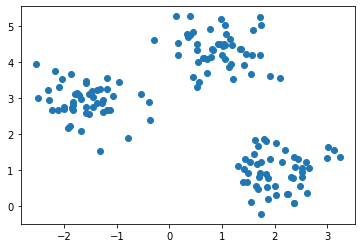

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y= make_blobs(n_samples=150,n_features=2, centers=3, cluster_std=0.5, shuffle= True, random_state=0)
plt.scatter(X[:,0],X[:,1])

In [7]:
y

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

k-mean algorithms:
1. Randomly pick k centroids from the examples as initial cluster centers.

2. Assign each example to the nearest centroid,

3. Move the centroids to the center of the examples that were assigned to it.

4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

How do we measure similarity between two point x,y:
Use squared Euclidean distiance:

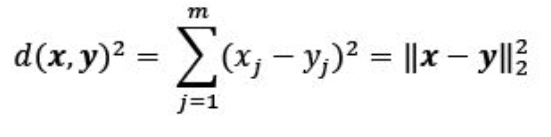

From there, we can derive the optimization function (cost function) through sum of squared error

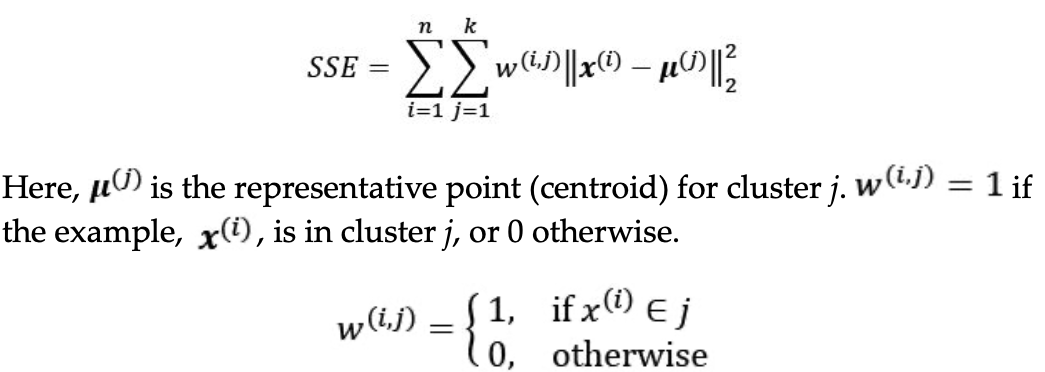

In [34]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3, init='random',n_init=10,max_iter=300, tol= 1e-04, random_state=0)
y_m=km.fit_predict(X)

n_init=10 to run k_mean clustering 10 time independently, with different random centroids to choose the final model as the one with the lowest SSE.

max_iter: iteration for each run (300)

One way to deal with convergence problems is to choose larger values for tol , which is a parameter that controls the tolerance with regard to the changes in the within-cluster SSE to declare convergence.

When we are applying k-means to real-world data using a Euclidean distance metric, we want to make sure that the features are measured on the same scale and apply z-score standardization or min-max scaling if necessary.

he other properties of k-means are that clusters do not overlap and are not hierarchical, and we also assume that there is at least one item in each cluster

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_m)

1.0

In [36]:
m=km.cluster_centers_
m

array([[ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409],
       [-1.5947298 ,  2.92236966]])

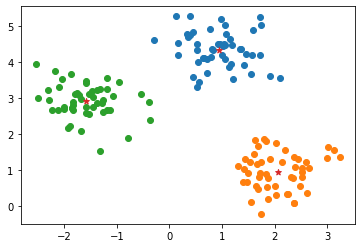

In [37]:
plt.scatter(X[y_m==0,0],X[y_m==0,1])
plt.scatter(X[y_m==1,0],X[y_m==1,1])
plt.scatter(X[y_m==2,0],X[y_m==2,1])
plt.scatter(m[:,0],m[:,1],marker='*')

hierarchical and density-based clustering: which does not need to choose k-mean

# A smarter way of placing the initial cluster centroids using k-means++.

which uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly. One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the best performing model in terms of the SSE.

Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which leads to be er and more consistent results than the classic k-means

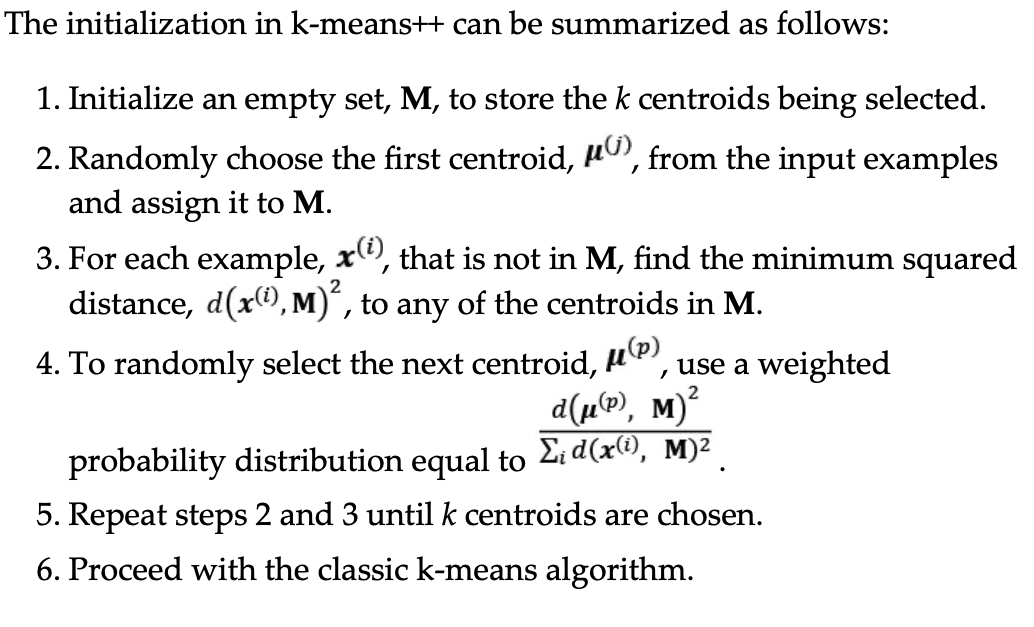

In [39]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol= 1e-04, random_state=0)
y_m=km.fit_predict(X)

# Hard versus soft clustering
Hard clustering: each example is assign to exactly 1 cluster
(k-means, k-means++)

soft clustering: 1 ex >1 cluster (fuzzy C-means (FCM))

The FCM procedure is very similar to k-means. However, we replace the hard cluster assignment with probabilities for each point belonging to each cluster.

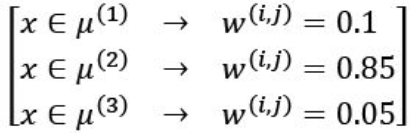

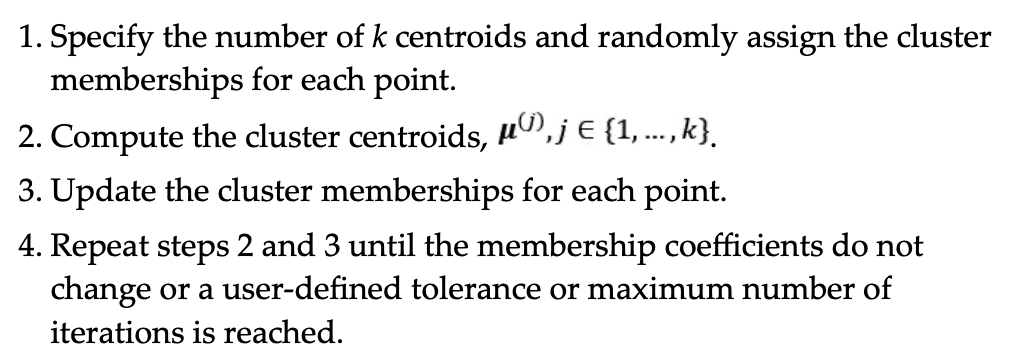

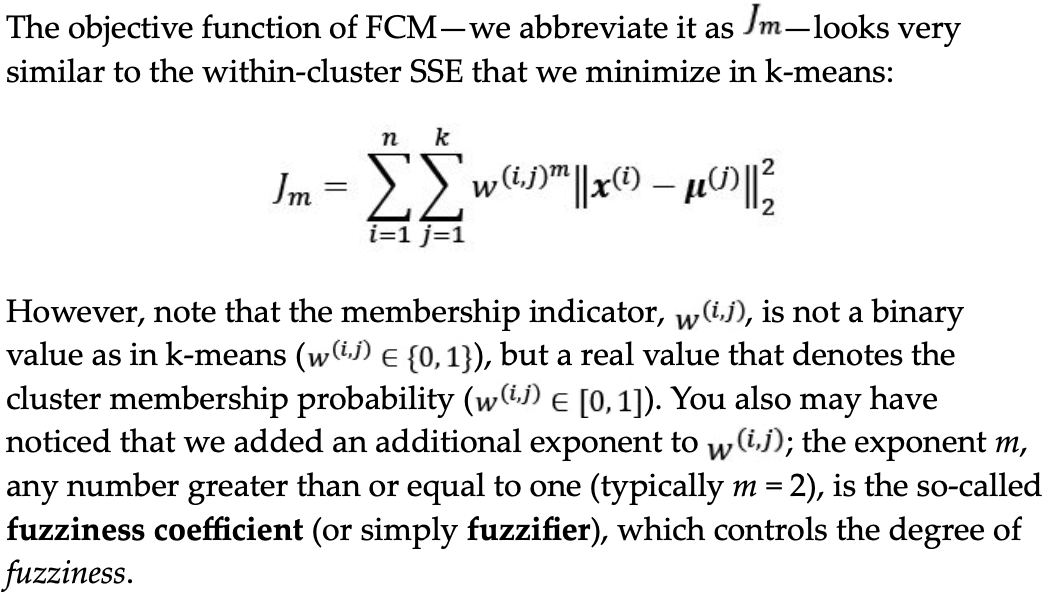

The larger the value of m, the smaller the cluster membership, , becomes, which leads to fuzzier clusters. The cluster membership
  
probability itself is calculated as follows:

Compute the SSE:
km.inertia_


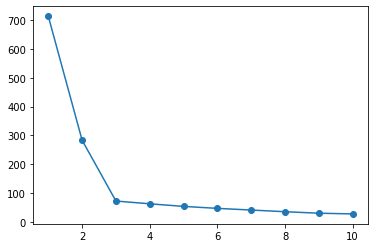

In [44]:
distortions = []
m= range(1,11)
for i in m:
  km= KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, tol= 1e-04, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(m,distortions,marker='o')

As you can see in the following plot, the elbow is located at k = 3, so this is evidence that k = 3 is indeed a good choice for this dataset: